# **About the Notebook:-**

- Applying Kmeans for clustering and Agglomreative Clustering to distinguish between Abalone gender and decide wheather (Male, female, Infants) in regrad with the Number of Rings that appears on its surface membrane.

- Using Kmeans as Features Engineering methodology.

- Create RandomforestCalssifier with kmeans as feature and without Kmeans to test ROC-AUC score.


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
%matplotlib inline
print('Setup Completed ^^')


Setup Completed ^^


In [4]:
data = pd.read_csv('../datasets/original/abalone.csv')
data.head().T


,0,1,2,3,4
Sex,M,M,F,M,I
Length,0.455,0.35,0.53,0.44,0.33
Diameter,0.365,0.265,0.42,0.365,0.255
Height,0.095,0.09,0.135,0.125,0.08
Whole weight,0.514,0.2255,0.677,0.516,0.205
Shucked weight,0.2245,0.0995,0.2565,0.2155,0.0895
Viscera weight,0.101,0.0485,0.1415,0.114,0.0395
Shell weight,0.15,0.07,0.21,0.155,0.055
Rings,15,7,9,10,7


In [5]:
data.shape


(4177, 9)

In [6]:
data.dtypes


Sex                object
Length            float64
Diameter          float64
Height            float64
Whole weight      float64
Shucked weight    float64
Viscera weight    float64
Shell weight      float64
Rings               int64
dtype: object

In [7]:
data.Sex.value_counts(normalize=True)


M    0.365813
I    0.321283
F    0.312904
Name: Sex, dtype: float64

In [8]:
# Number of Rings distributions :
data.Rings.value_counts().sort_index()


1       1
2       1
3      15
4      57
5     115
6     259
7     391
8     568
9     689
10    634
11    487
12    267
13    203
14    126
15    103
16     67
17     58
18     42
19     32
20     26
21     14
22      6
23      9
24      2
25      1
26      1
27      2
29      1
Name: Rings, dtype: int64

# **Data Represention:-**


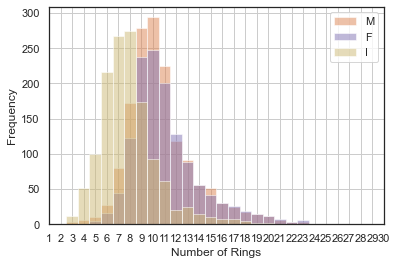

In [9]:
# seaborn styles
sns.set_context('notebook')
sns.set_style('white')

# custom colors
male = sns.color_palette()[1]
female = sns.color_palette()[4]
infant = sns.color_palette()[8]
# set bins for histogram
bin_range = np.array(range(1, 31))

# plot histogram of quality counts for red and white wines
ax = plt.axes()
for color, plot_color in zip(['M', 'F', 'I'], [male, female, infant]):
    q_data = data.loc[data.Sex == color, 'Rings']
    q_data.hist(bins=bin_range,
                alpha=0.5, ax=ax,
                color=plot_color, label=color)


ax.legend()
ax.set(xlabel='Number of Rings', ylabel='Frequency')

# force tick labels to be in middle of region
ax.set_xlim(3, 30)
ax.set_xticks(bin_range+0.5)
ax.set_xticklabels(bin_range)
ax.grid('on')


<AxesSubplot:xlabel='count', ylabel='Sex'>

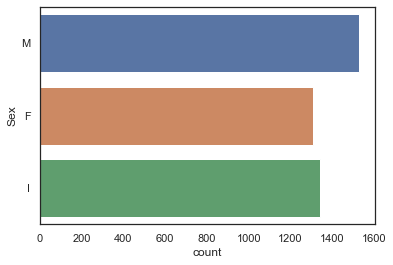

In [10]:
sns.set_style('white')
sns.countplot(data=data, y='Sex')


<AxesSubplot:xlabel='Sex', ylabel='Rings'>

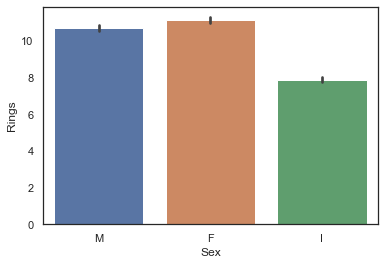

In [11]:
sns.barplot(x=data['Sex'], y=data['Rings'])


# **Correlation and Relationship:-**


**Examine the Correlation and skew of the relevant variables excepting the Sex variables.**


In [12]:
float_columns = [x for x in data.columns if x not in ['Sex', 'Rings']]

# correlation matrix :
corr_mat = data[float_columns].corr()
# Strip out the diagnoal values for next step:
for x in range(len(float_columns)):
    corr_mat.iloc[x, x] = 0.0

corr_mat


,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight
Length,0.000000,0.986812,0.827554,0.925261,0.897914,0.903018,0.897706
Diameter,0.986812,0.000000,0.833684,0.925452,0.893162,0.899724,0.905330
Height,0.827554,0.833684,0.000000,0.819221,0.774972,0.798319,0.817338
Whole weight,0.925261,0.925452,0.819221,0.000000,0.969405,0.966375,0.955355
Shucked weight,0.897914,0.893162,0.774972,0.969405,0.000000,0.931961,0.882617
Viscera weight,0.903018,0.899724,0.798319,0.966375,0.931961,0.000000,0.907656
Shell weight,0.897706,0.905330,0.817338,0.955355,0.882617,0.907656,0.000000


<AxesSubplot:>

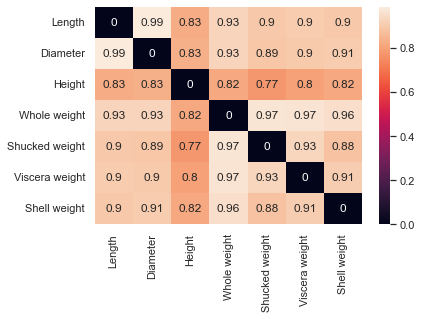

In [13]:
sns.heatmap(data=corr_mat, annot=True)


In [14]:
# pairwise maximal correlations:
corr_mat.abs().idxmax()


Length                  Diameter
Diameter                  Length
Height                  Diameter
Whole weight      Shucked weight
Shucked weight      Whole weight
Viscera weight      Whole weight
Shell weight        Whole weight
dtype: object

**Examination of skew values:-**


In [15]:
skew_columns = (data[float_columns].skew().sort_values(ascending=False))
skew_columns = skew_columns.loc[skew_columns > 0.75]
skew_columns


Height    3.128817
dtype: float64

**Perform log transformation on skew columns:**


In [16]:
for col in skew_columns.index.tolist():
    data[col] = np.log1p(data[col])


# **Perform Feature Scaling:-**


In [17]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
data[float_columns] = sc.fit_transform(data[float_columns])
data.head()


,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,-0.574558,-0.432149,-1.101229,-0.641898,-0.607685,-0.726212,-0.638217,15
1,M,-1.448986,-1.439929,-1.229780,-1.230277,-1.170910,-1.205221,-1.212987,7
2,F,0.050033,0.122130,-0.093465,-0.309469,-0.463500,-0.356690,-0.207139,9
3,M,-0.699476,-0.432149,-0.342036,-0.637819,-0.648238,-0.607600,-0.602294,10
4,I,-1.615544,-1.540707,-1.488661,-1.272086,-1.215968,-1.287337,-1.320757,7


**Pairplot for the transformed and Scaled features:-**


KeyboardInterrupt: 

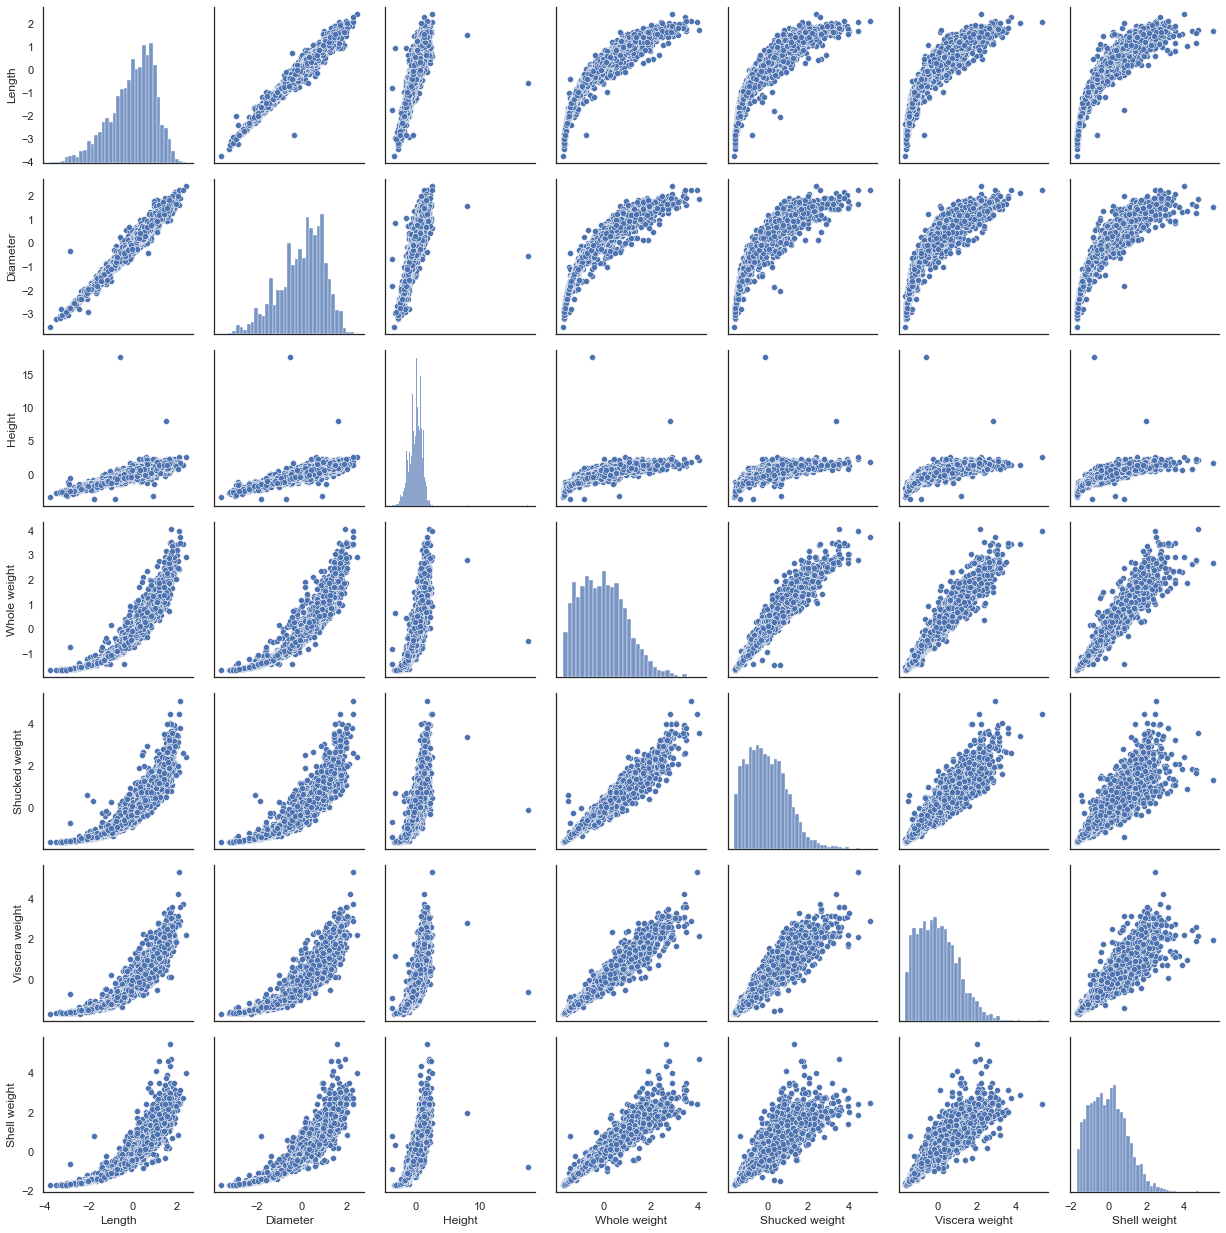

In [18]:
sns.set_context('notebook')
sns.pairplot(data[float_columns])


# **Examin Kmeans for Clustering:-**


In [ ]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans = kmeans.fit(data[float_columns])


In [ ]:
data['kmeans'] = kmeans.predict(data[float_columns])


In [ ]:
(data[['Sex', 'kmeans']].groupby(['kmeans', 'Sex']
                                 ).size().to_frame().rename(columns={0: 'number'}))


number
kmeans Sex        
0      F       604
       I        38
       M       630
1      F       121
       I       814
       M       211
2      F       582
       I       490
       M       687

**Plot number of clusters VS inertia:-**


In [ ]:
# create and fit a range of models:
km_list = list()
for clust in range(1, 21):
    km = KMeans(n_clusters=clust, random_state=42)
    km = km.fit(data[float_columns])
    km_list.append(pd.Series({'clusters': clust,
                             'inertia': km.inertia_,
                              'model': km}))


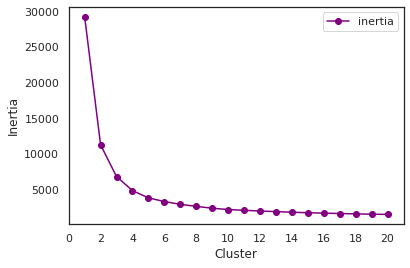

In [ ]:
plot_data = (pd.concat(km_list, axis=1)
             .T
             [['clusters', 'inertia']]
             .set_index('clusters'))

ax = plot_data.plot(marker='o', ls='-', color='purple')
ax.set_xticks(range(0, 21, 2))
ax.set_xlim(0, 21)
ax.set(xlabel='Cluster', ylabel='Inertia')


# **Agglomreative Cluserting:-**


- fit an agglomerative clustering model with 3 clusters.
- compare the results to those obtained by kmeans with regrad to the number of rings among the sex observations (male, female or infants).


In [ ]:
from sklearn.cluster import AgglomerativeClustering
ag = AgglomerativeClustering(
    n_clusters=3, linkage='ward', compute_full_tree=True)
ag = ag.fit(data[float_columns])
data['agglom'] = ag.fit_predict(data[float_columns])


- first for Agglomerative clustering:


In [ ]:
data[['Sex', 'agglom', 'kmeans']].groupby(
    ['Sex', 'agglom']).size().to_frame().rename(columns={0: 'number'})


number
Sex agglom        
F   0          292
    1          699
    2          316
I   0         1096
    1          236
    2           10
M   0          420
    1          777
    2          331

# **Comparing Clustering results:**


In [ ]:

(data[['Sex', 'agglom', 'kmeans']]
 .groupby(['Sex', 'agglom', 'kmeans'])
 .size()
 .to_frame()
 .rename(columns={0: 'number'}))


number
Sex agglom kmeans        
F   0      1          121
           2          171
    1      0          288
           2          411
    2      0          316
I   0      1          814
           2          282
    1      0           28
           2          208
    2      0           10
M   0      1          211
           2          209
    1      0          299
           2          478
    2      0          331

In [ ]:
data.describe(include='object').T


,count,unique,top,freq
Sex,4177,3,M,1528


In [ ]:
data.describe().T


,count,mean,std,min,25%,50%,75%,max
Length,4177.0,-6.651770e-16,1.000120,-3.739154,-0.616198,0.174951,0.757903,2.423480
Diameter,4177.0,-3.957146e-16,1.000120,-3.556267,-0.583316,0.172519,0.726798,2.440025
Height,4177.0,-1.549581e-16,1.000120,-3.650374,-0.592827,0.030001,0.639318,17.587888
Whole weight,4177.0,1.466122e-16,1.000120,-1.686092,-0.789758,-0.059638,0.661305,4.072271
Shucked weight,4177.0,-4.582295e-17,1.000120,-1.614731,-0.781159,-0.105289,0.642673,5.085388
Viscera weight,4177.0,1.085504e-16,1.000120,-1.643173,-0.794642,-0.087532,0.660635,5.286500
Shell weight,4177.0,3.648825e-16,1.000120,-1.705134,-0.781909,-0.034708,0.647832,5.504642
Rings,4177.0,9.933684e+00,3.224169,1.000000,8.000000,9.000000,11.000000,29.000000
kmeans,4177.0,1.116591e+00,0.843930,0.000000,0.000000,1.000000,2.000000,2.000000
agglom,4177.0,7.244434e-01,0.717167,0.000000,0.000000,1.000000,1.000000,2.000000


# **Explore Clustering as form of feature Engineering:-**


- create a binary target varibale y, defining if the number of Rings is greater than 9 or Not

- create a variable called x_with_kmeans from data,by dropping the columns "Rings","Sex" and "Agglom" from the dataset.Create x_without_kmeans from that by dropping "Kmeans".

- For both datasets, using StratifiedShuffleSplit with 10 splits and fit 10 Random forest Classifiersand find the mean of ROC-AUC scores from these 10 Classifiers.

- Compare the average of ROC-AUC scores for both models, the one using the KMeans cluster as a feature and the one that doesn't use it.


In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.model_selection import StratifiedShuffleSplit


**Set our features:**


In [ ]:
y = (data['Rings'] > 9).astype(int)
X_with_kmeans = data.drop(['agglom', 'Sex', 'Rings'], axis=1)
X_without_kmeans = X_with_kmeans.drop('kmeans', axis=1)


**Create Split method:-**


In [ ]:
sss = StratifiedShuffleSplit(n_splits=10, random_state=6535)


**Split up the dataset and initaite RandomForest Calssifier:-**


In [ ]:
def get_avg_roc_10splits(estimator, X, y):
    roc_auc_list = []
    for train_index, test_index in sss.split(X, y):
        X_train, X_test = X.loc[train_index], X.iloc[test_index]
        y_train, y_test = y.loc[train_index], y.iloc[test_index]
        estimator.fit(X_train, y_train)
        y_predictor = estimator.predict(X_test)
        y_scored = estimator.predict_proba(X_test)[:, 1]
        roc_auc_list.append(roc_auc_score(y_test, y_scored))

    return np.mean(roc_auc_list)


estimator = RandomForestClassifier()
roc_with_kmeans = get_avg_roc_10splits(estimator, X_with_kmeans, y)
roc_without_kmeans = get_avg_roc_10splits(estimator, X_without_kmeans, y)
print(
    "Without kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_without_kmeans))
print(
    "Using kmeans cluster as input to Random Forest, roc-auc is \"{0}\"".format(roc_with_kmeans))


Without kmeans cluster as input to Random Forest, roc-auc is "0.8661378205128205"
Using kmeans cluster as input to Random Forest, roc-auc is "0.8660210622710622"
